In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pykrige

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 852.6/852.6 kB 2.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_merged = pd.read_csv('/content/drive/MyDrive/Predicted and preprocessed data sets /training_test_combined_vmag_ky_230710.csv')
df_kout = pd.read_csv('/content/drive/MyDrive/Predicted and preprocessed data sets /angelina_kriging_angle_residual_reconstruct_prediction.csv')
df_kout.head()

df_k1201 = pd.read_csv('/content/drive/MyDrive/REU 2023 Team 1: Ice Bed Topography Prediction/Research/Predicted and preprocessed data sets /angelina-kriging-1201-merged.csv')
df_k1201.head()

,Unnamed: 0.1,Unnamed: 0,surf_x,surf_y,surf_vx,surf_vy,surf_elv,surf_dhdt,surf_SMB,krigingOut
0,0,0,-278075.0,-1697525.0,-117.986570,8.049935,1348.6687,-0.362801,0.102309,-425.140613
1,1,1,-278075.0,-1697675.0,-118.086580,8.429934,1347.2958,-0.363170,0.100127,-901.902944
2,2,2,-278075.0,-1697825.0,-118.103740,8.865048,1346.9690,-0.363538,0.098367,86.978483
3,3,3,-278075.0,-1697975.0,-118.038060,9.355281,1346.1609,-0.363907,0.096918,-653.937724
4,4,4,-278075.0,-1698125.0,-117.793236,9.596583,1345.8989,-0.364276,0.095606,-677.458092


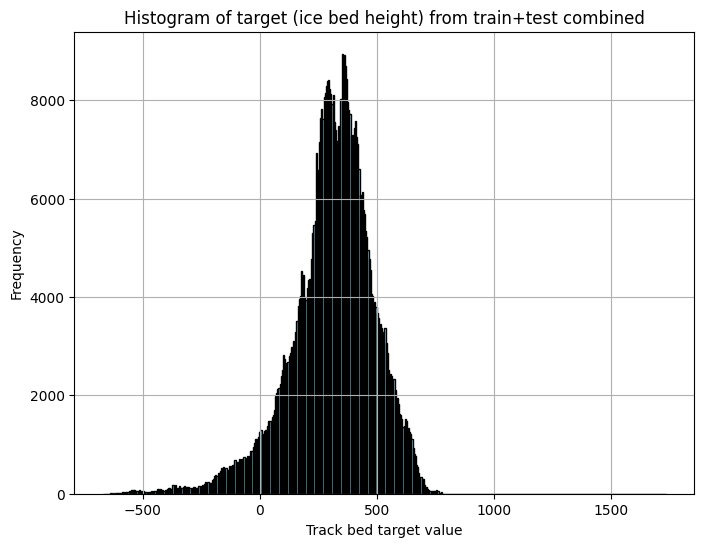

In [ ]:

# Plot the histogram
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(df_merged['track_bed_target'], bins=500, edgecolor='black', color='skyblue')  # bins: number of bins in the histogram
plt.xlabel('Track bed target value')
plt.ylabel('Frequency')
plt.title('Histogram of target (ice bed height) from train+test combined')
plt.grid(True)  # Optional: Add grid lines
plt.show()


In [ ]:
def rmspe(y_true, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_true - y_pred) / y_true))))*100
def rmspe_1(y_true, y_pred):
    return np.sqrt(np.nanmean(np.square(y_true - y_pred) / y_true))*100
#metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
# from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score


# Get validation statistics for kriging

In [ ]:
df_kout = df_kout.dropna()

In [ ]:

#LOSSES
print('RMSE:',np.sqrt(mean_squared_error(df_kout['track_bed_target'], df_kout['track_bed_target_kriging_prediction'])))
print('RMSE Percentage:',rmspe(df_kout['track_bed_target'], df_kout['track_bed_target_kriging_prediction']))
print('Mean Absolute Error:', mean_absolute_error(df_kout['track_bed_target'], df_kout['track_bed_target_kriging_prediction']))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_kout['track_bed_target'], df_kout['track_bed_target_kriging_prediction']))
print('R^2 Score:', r2_score(df_kout['track_bed_target'], df_kout['track_bed_target_kriging_prediction']))

RMSE: 190.45231760742337
RMSE Percentage: 1373.2065883908533
Mean Absolute Error: 7.840512898012666
Mean Absolute Percentage Error: 0.11201866177949667
R^2 Score: -0.11233624799714614


# Plot 1201x1201 output

In [ ]:
def plotHeatMap(x, y, target_Var):
    plt.figure(figsize=(30, 30))
    plt.scatter(x, y, c=target_Var, cmap='viridis', s=1)
    plt.colorbar()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Kriging residuals heatmap')
    plt.show()

In [ ]:
prediction_on_1201_2D = np.array(df_k1201['krigingOut']).reshape(1201,1201)
prediction_on_1201_2D.shape

ValueError: ignored